# Численное интегрирование

Здесь будут рассмотрены методы численного интегрирования:

- Прямоугольников
- Трапеций
- Симпсона


Все они будут применены для интегрирования одномерной функций:

- $f(x) = \sin(10x)x^3$
- $f(x) = x$
- $f(x) = e^x$

Будут построены графики зависимости ошибки от числа итераций

In [135]:
import matplotlib.pyplot as plt
import numpy as np
from tqdm import trange

In [136]:
def integrate_rectangle(f, a, b, n):
    """
    Интегрирование методом прямоугольников

    Args:
        f: функция, которую интегрируем
        a: нижний предел
        b: верхний предел
        n: число разбиений
    """

    h = (b - a) / n
    return h * sum([f(a + k * h) for k in range(n)])


In [137]:
def integrate_trapezoid(f, a, b, n):
    """
    Интегрирование методом трапеций

    Args:
        f: функция, которую интегрируем
        a: нижний предел
        b: верхний предел
        n: число разбиений
    """

    h = (b - a) / n
    return h * ((f(a) + f(b)) / 2 + sum([(f(a + k * h) + f(a + k * h + h)) / 2 for k in range(1, n)]))

In [138]:
def integrate_simpson(f, a, b, n):
    """
    Интегрирование методом Симпсона

    Args:
        f: функция, которую интегрируем
        a: нижний предел
        b: верхний предел
        n: число разбиений, должно быть равно четным
    """

    assert n % 2 == 0, "n должно быть четным"

    h = (b - a) / n

    # Формула Котеса
    return h / 3 * (
            f(a) + f(b)
            + 2 * sum([f(a + 2 * k * h) for k in range(1, n // 2)])
            + 4 * sum([f(a + 2 * k * h - h) for k in range(1, n // 2 + 1)])
    )

In [139]:
integrate_rectangle(lambda x: np.sin(10 * x) * x ** 3, 0, 1, 1000)

0.0631496783953007

In [140]:
integrate_trapezoid(lambda x: np.sin(10 * x) * x ** 3, 0, 1, 1000)

0.06260565728440638

In [141]:
integrate_simpson(lambda x: np.sin(10 * x) * x ** 3, 0, 1, 1000)

0.0628785030795635

Видно, что методы выдают примерно одинаковый результат, который близок к реальному 0.0628785

In [174]:
def plot_error(f, func_tex, a, b, max_iter, real_value):
    """
    Строит графики сходимости методов численного интегрирования от числа итераций

    Args:
        f: функция, которую интегрируем
        func_tex: представление функции в tex
        a: нижний предел
        b: верхний предел
        max_iter: число разбиений, должно быть равно четным
        real_value: реальное значение интеграла
    """
    rectangle_results = []
    trapezoid_results = []
    simpson_results = []

    # проход с шагом 2, чтобы не было проблем с методом Симпсона
    for n in trange(2, max_iter, 2):
        rectangle_results.append(integrate_rectangle(f, a, b, n))
        trapezoid_results.append(integrate_trapezoid(f, a, b, n))
        simpson_results.append(integrate_simpson(f, a, b, n))

    rectangle_results = np.array(rectangle_results)
    trapezoid_results = np.array(trapezoid_results)
    simpson_results = np.array(simpson_results)

    rectangle_errors = np.abs(rectangle_results - real_value)
    trapezoid_errors = np.abs(trapezoid_results - real_value)
    simpson_errors = np.abs(simpson_results - real_value)

    if real_value == 0:
        rv = 1e-8
    else:
        rv = real_value

    rectangle_rel_errors = rectangle_errors / rv * 100
    trapezoid_rel_errors = trapezoid_errors / rv * 100
    simpson_rel_errors = simpson_errors / rv * 100

    tr = 1
    f, ax = plt.subplots(nrows=2, figsize=(10, 10))
    ax[0].plot([2, max_iter], [real_value, real_value], linestyle='--', label=f'real value = {real_value}')
    ax[0].plot(range(2 + 2 * tr, max_iter, 2), rectangle_results[tr:], label=f'rectangle = {rectangle_results[-1]}')
    ax[0].plot(range(2 + 2 * tr, max_iter, 2), trapezoid_results[tr:], label=f'trapezoid = {trapezoid_results[-1]}')
    ax[0].plot(range(2 + 2 * tr, max_iter, 2), simpson_results[tr:], label=f'simpson = {simpson_results[-1]}')
    ax[0].set_yscale('symlog')
    ax[0].set_xscale('log')
    ax[0].legend()
    ax[0].set_title(fr'Значение интеграла от $ {func_tex} $')

    ax[1].plot(range(2 + 2 * tr, max_iter, 2), rectangle_rel_errors[tr:], label='rectangle')
    ax[1].plot(range(2 + 2 * tr, max_iter, 2), trapezoid_rel_errors[tr:], label='trapezoid')
    ax[1].plot(range(2 + 2 * tr, max_iter, 2), simpson_rel_errors[tr:], label='simpson')
    ax[1].set_yscale('symlog')
    ax[1].set_xscale('log')
    ax[1].legend()
    ax[1].set_title("Относительная ошибка, %")

    f.show()

100%|██████████| 499/499 [00:01<00:00, 317.30it/s] 
C:\Users\Dmitry\AppData\Local\Temp\ipykernel_10360\2814480265.py:59: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  f.show()


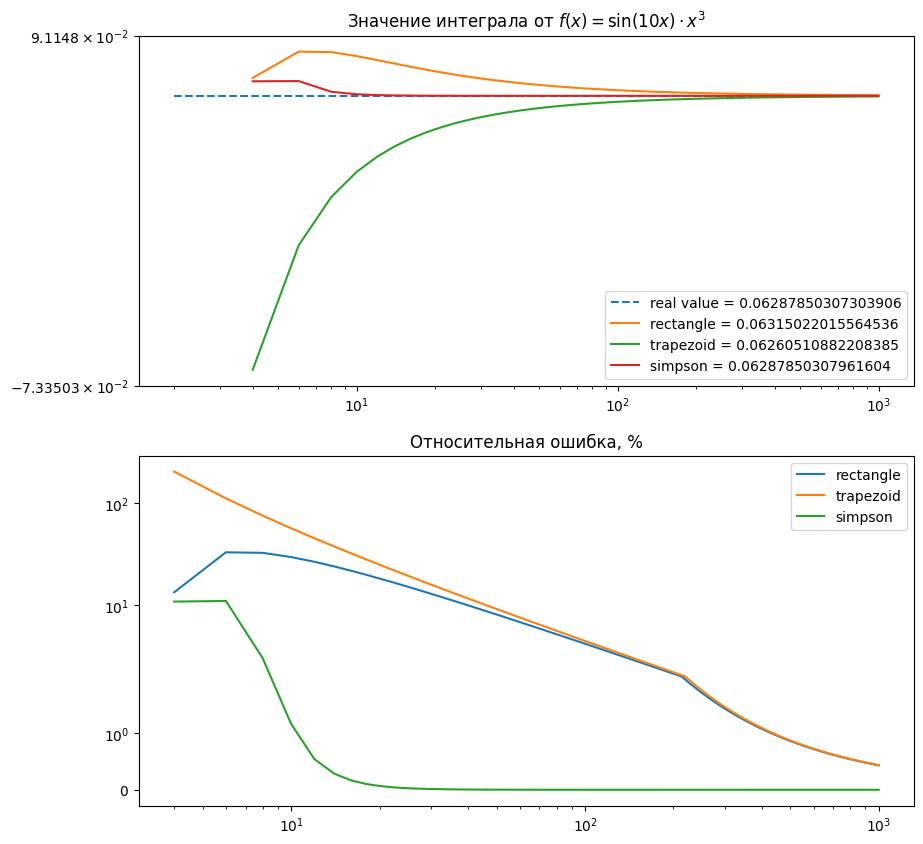

In [175]:
plot_error(lambda x: np.sin(10 * x) * x ** 3, r'f(x) = \sin(10x) \cdot x^3', 0, 1, 1000, 0.06287850307303905799823363)

100%|██████████| 499/499 [00:00<00:00, 1870.98it/s]
C:\Users\Dmitry\AppData\Local\Temp\ipykernel_10360\2814480265.py:59: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  f.show()


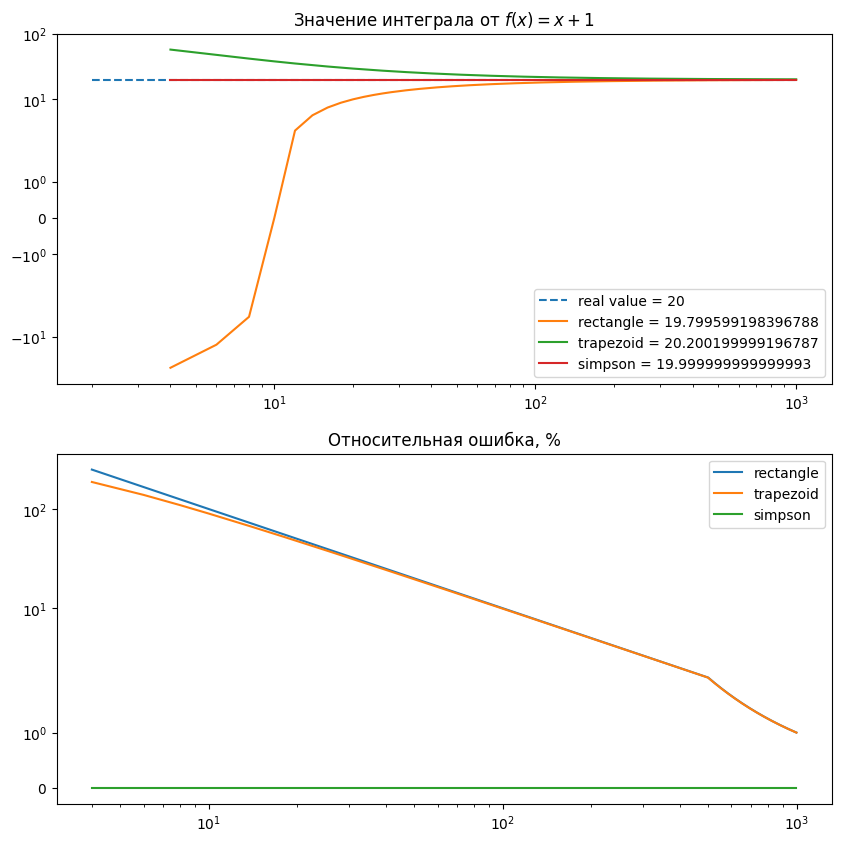

In [176]:
plot_error(lambda x: x+1, r'f(x) = x+1', -10, 10, 1000, 20)

100%|██████████| 499/499 [00:00<00:00, 521.16it/s] 
C:\Users\Dmitry\AppData\Local\Temp\ipykernel_10360\2814480265.py:59: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  f.show()


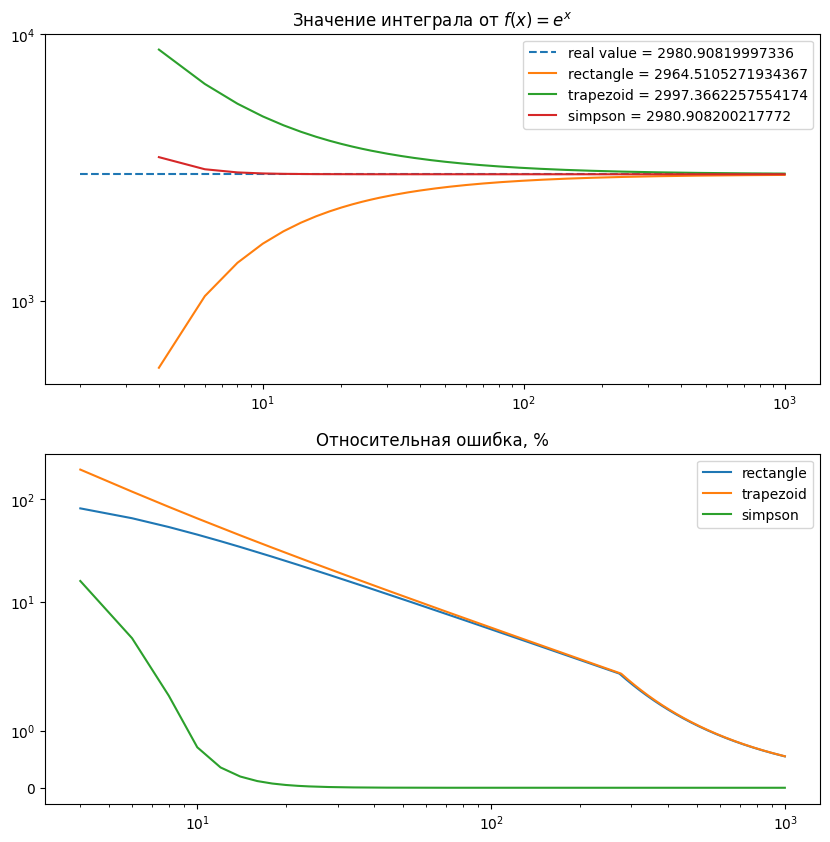

In [177]:
plot_error(np.exp, r'f(x) = e^x', -3, 8, 1000, 2980.90819997336)

100%|██████████| 499/499 [00:01<00:00, 381.23it/s] 
C:\Users\Dmitry\AppData\Local\Temp\ipykernel_10360\2814480265.py:59: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  f.show()


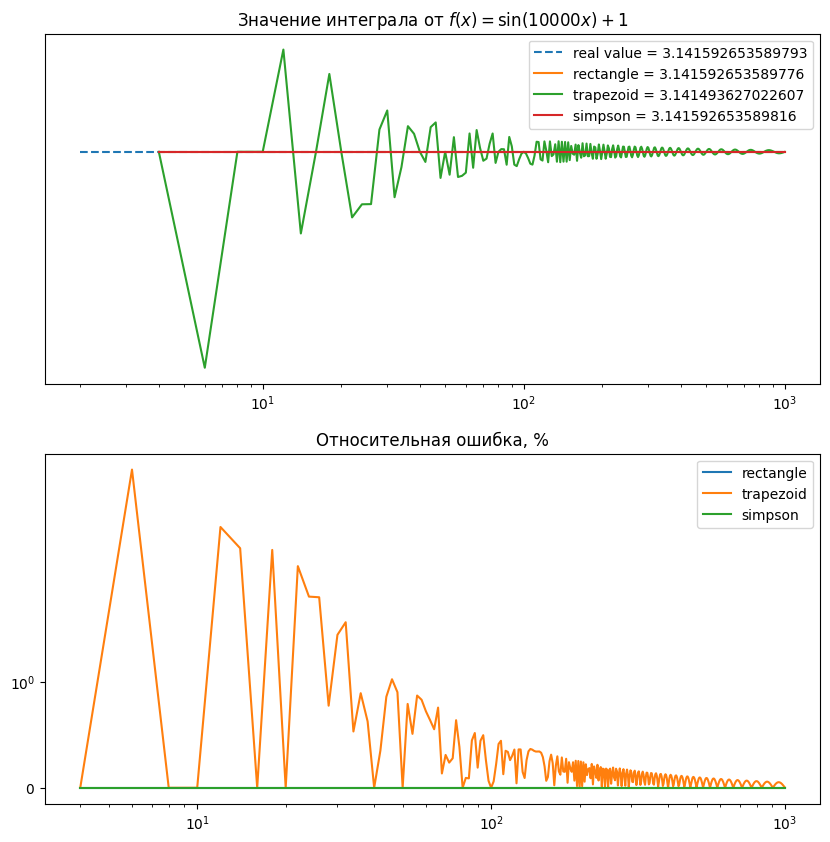

In [178]:
plot_error(lambda x: np.sin(10000*x)+1, r'f(x) = \sin(10000x)+1', 0, np.pi, 1000, np.pi)

# Для этой быстро осциллирующей функции методы прямоугольников и Симпсона работают примерно одинаково эффективно,
# а вот метод трапеций сильно хуже

100%|██████████| 499/499 [00:02<00:00, 211.34it/s]
C:\Users\Dmitry\AppData\Local\Temp\ipykernel_10360\2814480265.py:59: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  f.show()


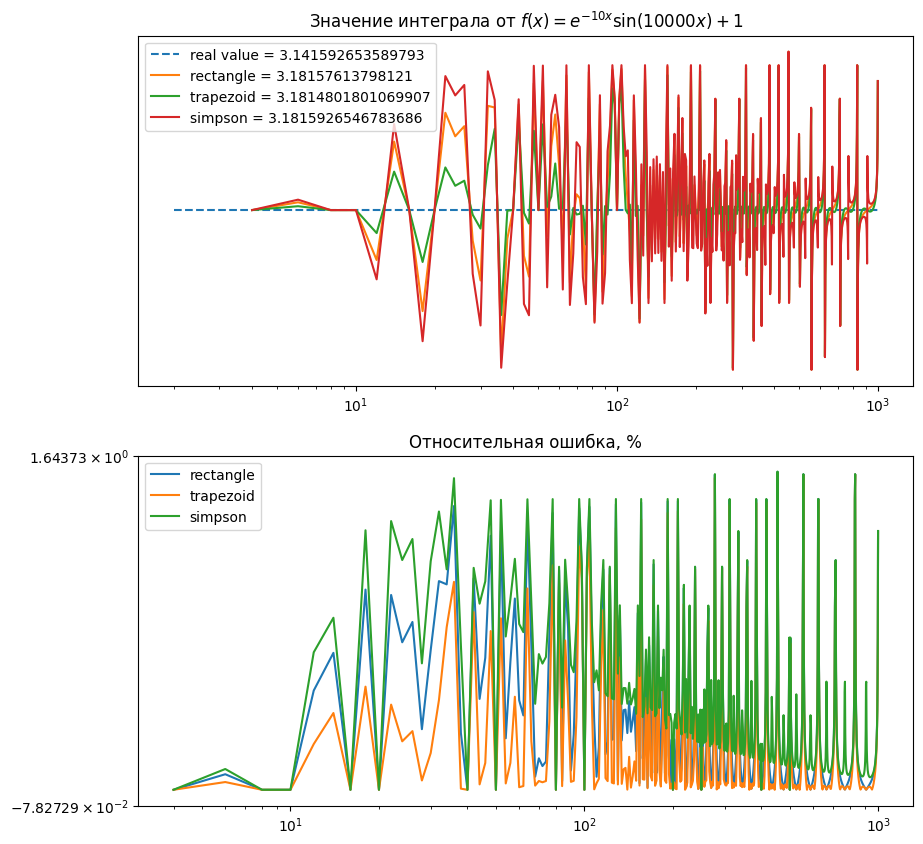

In [180]:
plot_error(lambda x: np.exp(-10*x)*np.sin(10000*x)+1, r'f(x) = e^{-10x}\sin(10000x)+1', 0, np.pi, 1000, np.pi)

# Тут вообще всё плохо

## Выводы

Погрешность методов прямоугольников и трапеций падает примерно одинаково с ростом числа итераций.
В свою очередь метод симпсона сходится гораздо быстрее, так как его порядок точности больше.

Хотя есть странность в графиках, на примерно 100-200 итераций характер сходимости меняется для методов прямоугольников и трапеций.

Конечно, можно было еще привести квадратурную формулу Гаусса-Кристофеля, но для неё нужно уметь решать нелинейную систему уравнений, что затрудняет написание кода.